In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("sales.csv",encoding="unicode_escape")

In [9]:
df.shape

(11251, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [11]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

# Dropped null columns from the table

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


# Null valued columns removed from the tabel

In [13]:
pd.isnull(df).sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [14]:
df.fillna(df['Amount'].mean(),inplace=True)

In [15]:
pd.isnull(df).sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


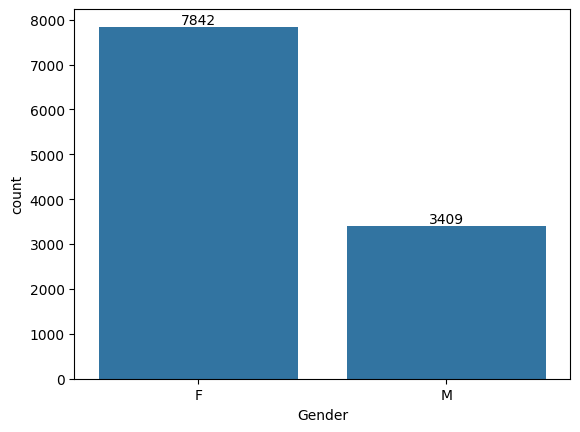

In [16]:
ax=sns.countplot(x='Gender',data=df)
for bars in (ax.containers):
  ax.bar_label(bars)

# Females bought things more than double of male

In [28]:
gender_group=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
gender_group['Amount'] = gender_group['Amount'].astype(int)
gender_group

,Gender,Amount
0,F,74430392
1,M,31932183


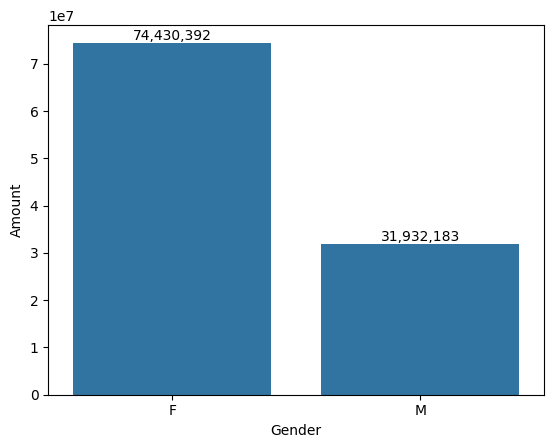

In [29]:
ax=sns.barplot(x='Gender',y='Amount',data=gender_group)
for bars in ax.containers:
  ax.bar_label(bars,fmt='{:,.0f}')

# Female spent 74430392 and male spent 31932183

[Text(0, 0, '1272'),
 Text(0, 0, '134'),
 Text(0, 0, '574'),
 Text(0, 0, '155'),
 Text(0, 0, '291'),
 Text(0, 0, '278'),
 Text(0, 0, '705')]

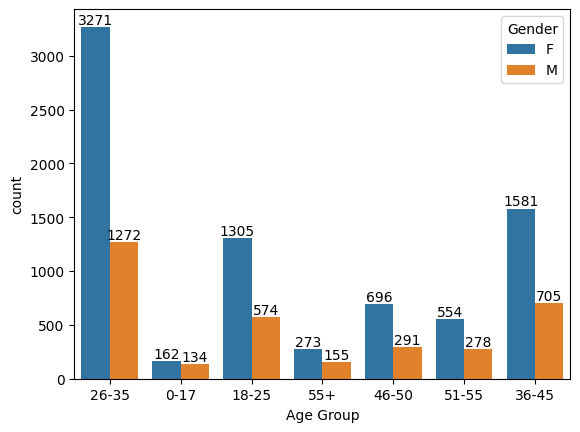

In [27]:
ax=sns.countplot(x='Age Group',data=df,hue='Gender')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

# The age group 26-35 are buying things more than any other groups and females of this group buying more.

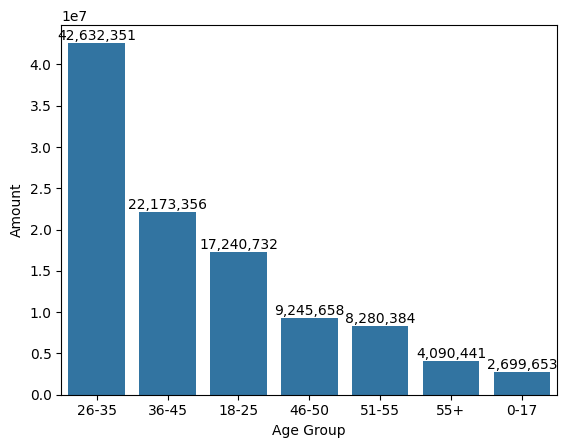

In [32]:
age_group=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
# age_group['Amount'] = age_group['Amount'].astype(int)
ax=sns.barplot(x='Age Group',y='Amount',data=age_group)
for bars in ax.containers:
  ax.bar_label(bars,fmt='{:,.0f}')

# Most buying age group is 26-25,2nd age group is 36-45 and the 3rd is 18-25.0-17 is the less buying age group

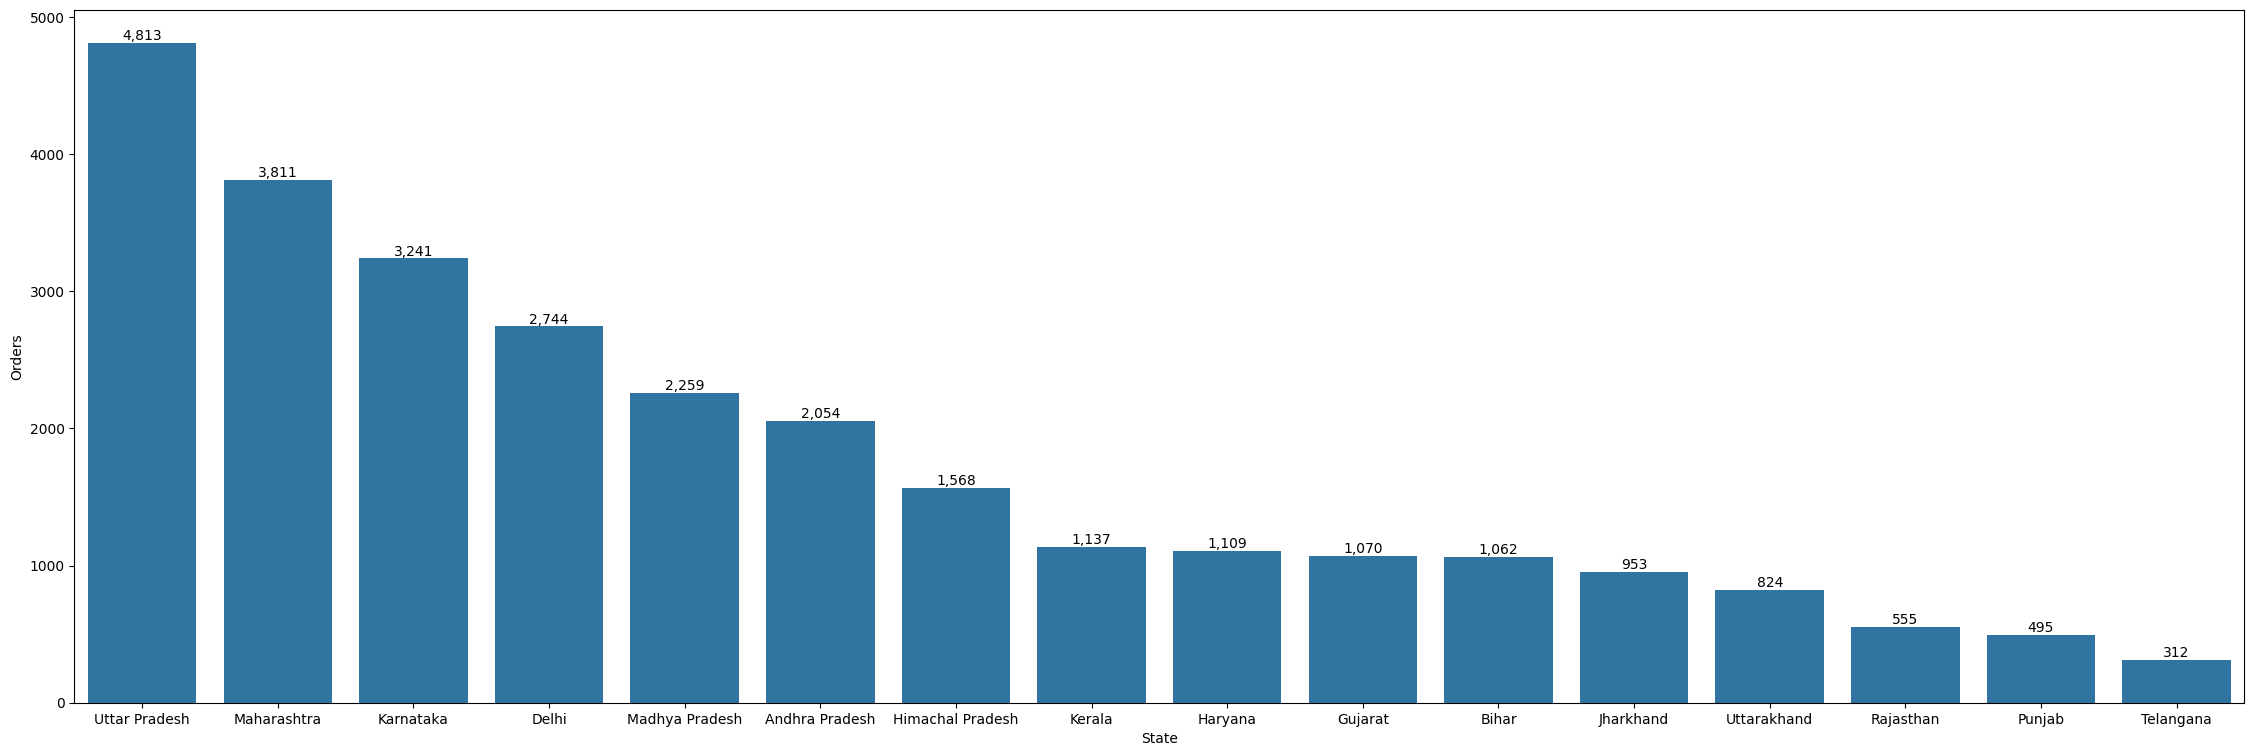

In [42]:
states_group =df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)
plt.figure(figsize=(28,9))
ax=sns.barplot(x='State',y='Orders',data=states_group)
for bars in ax.containers:
  ax.bar_label(bars,fmt='{:,.0f}')

# Uttar Pradesh,Maharashtra and Karnatake peoples are buying the most and people of Rajasthan,Punjub and Telangana buying the less

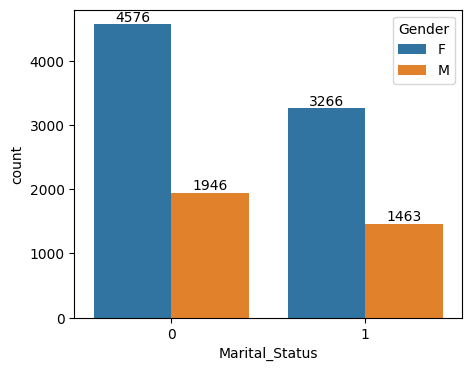

In [49]:
plt.figure(figsize=(5,4))
ax=sns.countplot(x="Marital_Status",data=df,hue='Gender')
for bars in (ax.containers):
  ax.bar_label(bars)

# Maried female are buying the most and unmaried males are buying the less

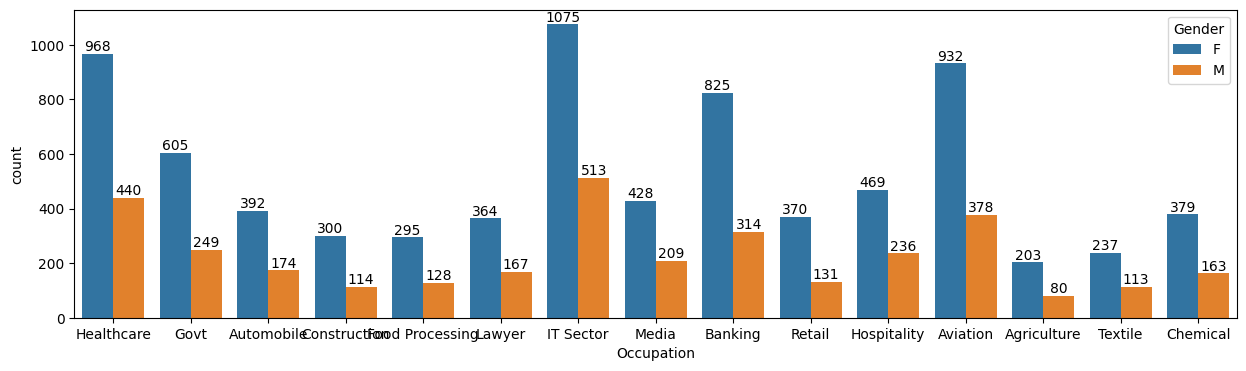

In [51]:
plt.figure(figsize=(15,4))
ax=sns.countplot(x="Occupation",data=df,hue='Gender')
for bars in (ax.containers):
  ax.bar_label(bars)

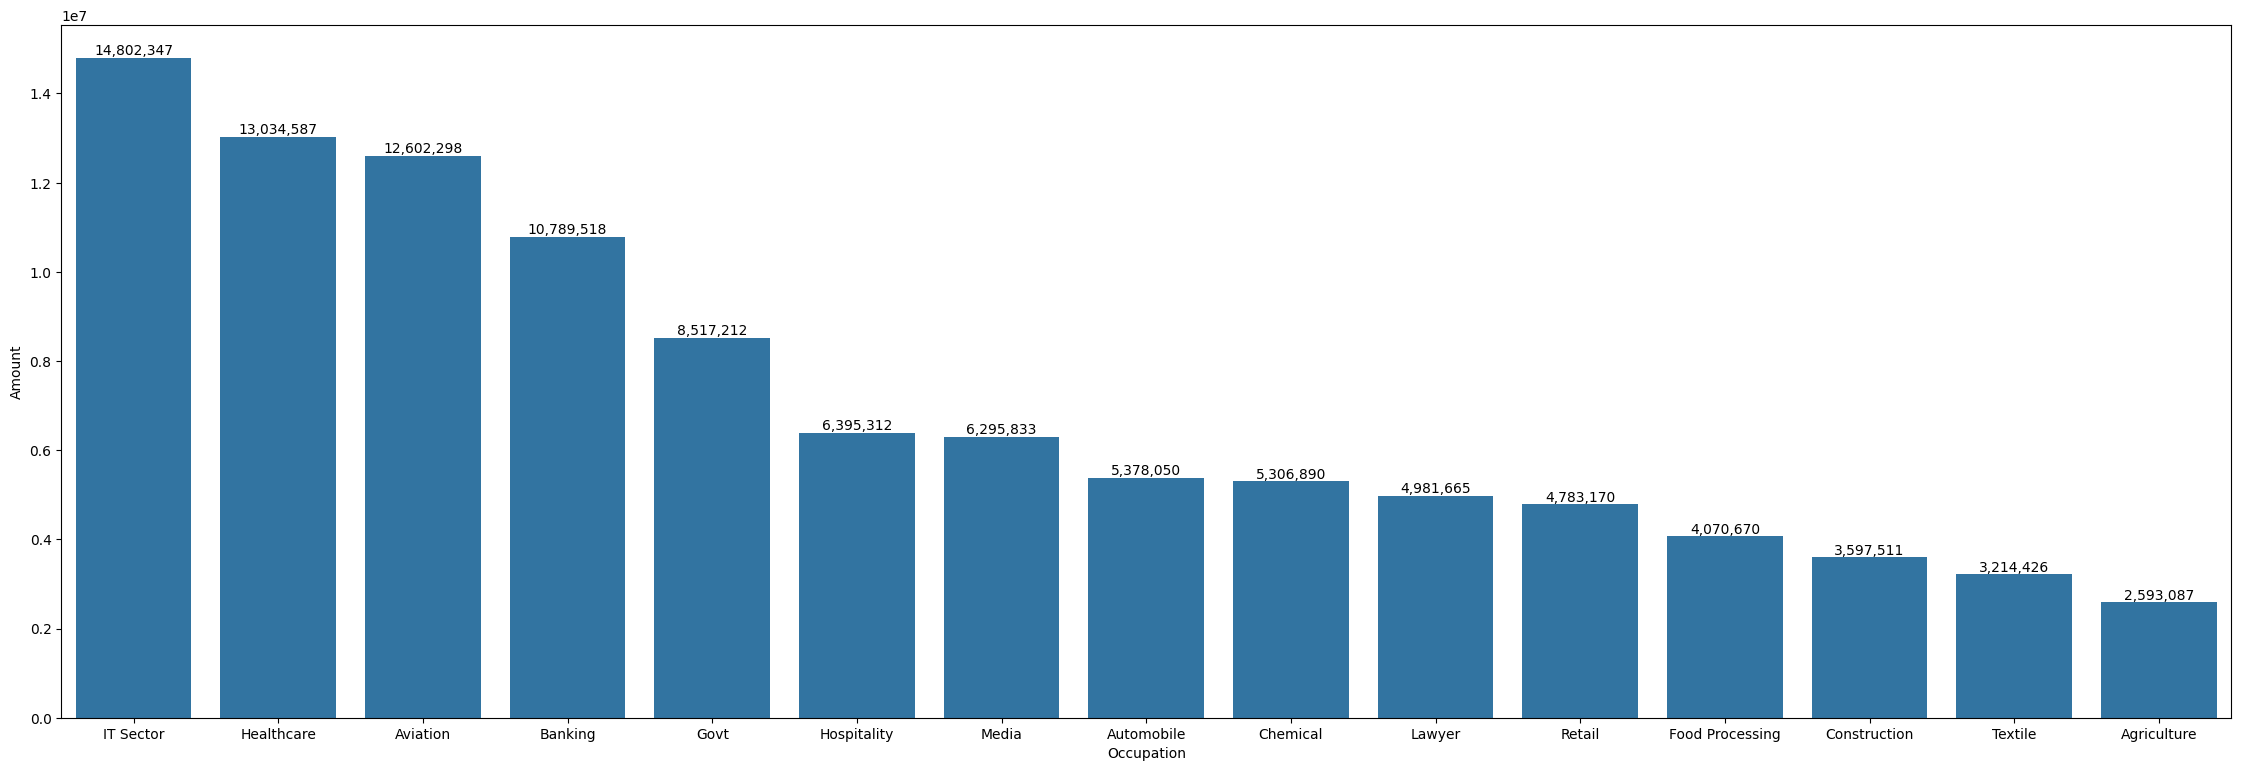

In [55]:
occupation_group =df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
plt.figure(figsize=(28,9))
ax=sns.barplot(x='Occupation',y='Amount',data=occupation_group)
for bars in ax.containers:
  ax.bar_label(bars,fmt='{:,.0f}')

# People from It Sector,Healthcare and Aviation occupations are buying the most and Construction ,textile and Agriculture are buying the less

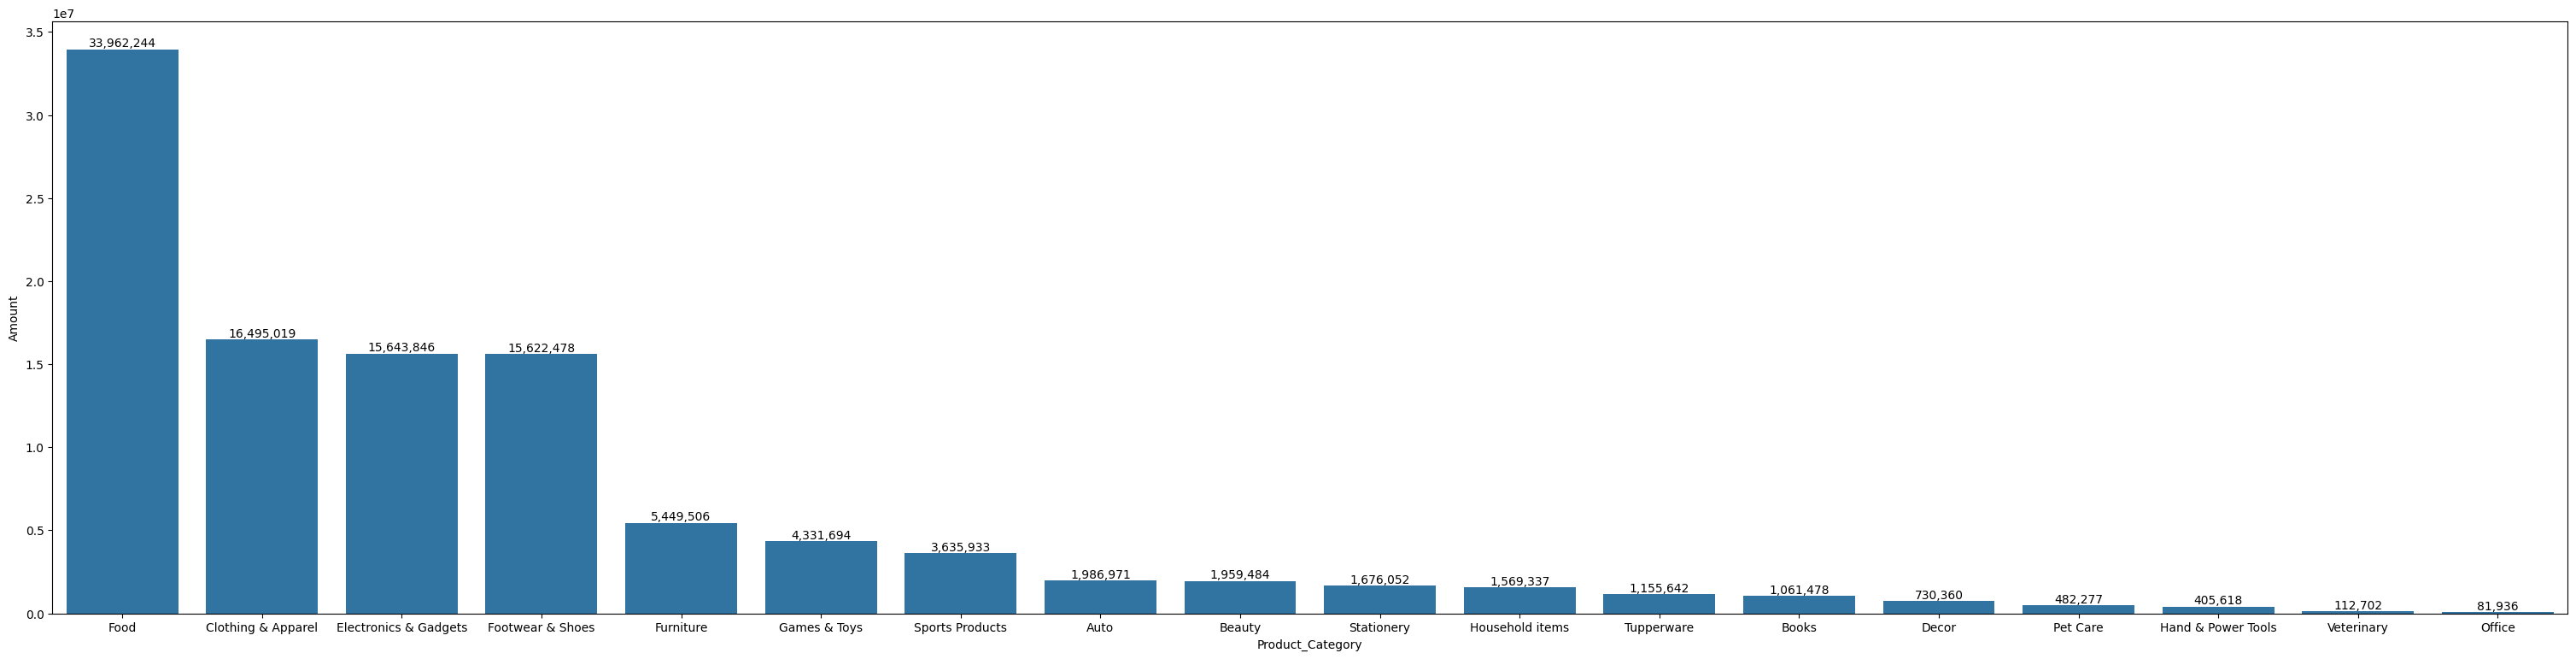

In [67]:
product_group =df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
plt.figure(figsize=(38,9))
ax=sns.barplot(x='Product_Category',y='Amount',data=product_group)
for bars in ax.containers:
  ax.bar_label(bars,fmt='{:,.0f}')

# Food item is getting sold more than any other product and 2nd level selling products are Clothing and Apparel,Electronics and Gadgets,Footwear and Shoes.Office and Vaterinery products are getting sold the lest

<Axes: xlabel='Product_ID', ylabel='Orders'>

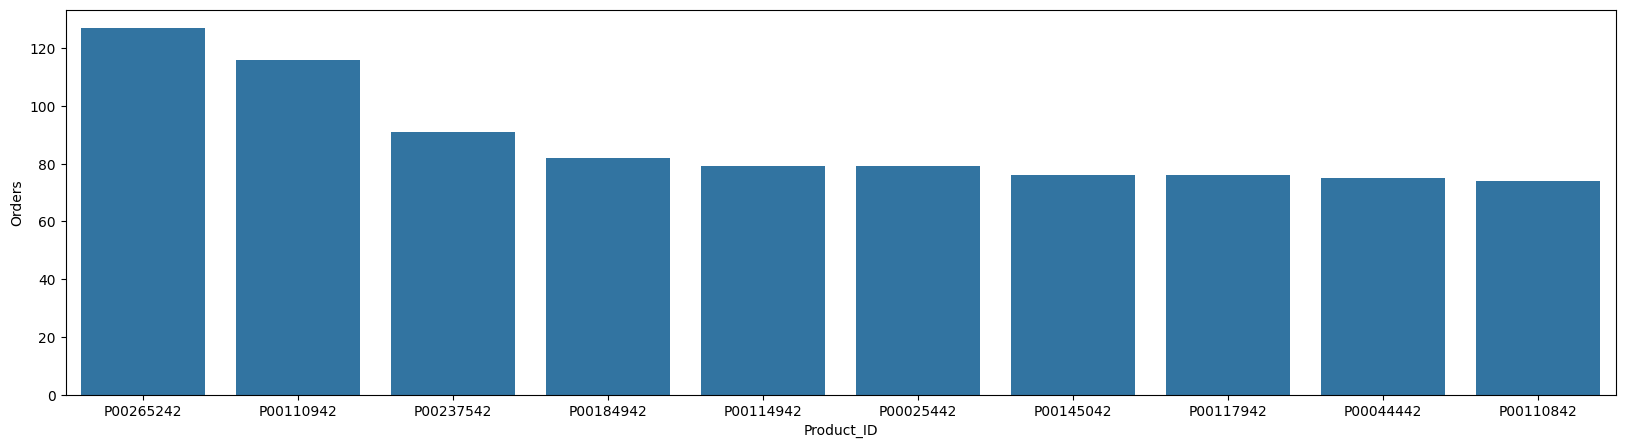

In [66]:
product_id_group =df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
plt.figure(figsize=(20,5))
sns.barplot(x='Product_ID',y='Orders',data=product_id_group)

# These are the Product id in decresing order